In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('customer_data.csv')
data.head()

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


In [3]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# Split data into train and test
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]

# Split data into X and y
x_train = train.drop('purchased', axis=1)
y_train = train['purchased']

x_test = test.drop('purchased', axis=1)
y_test = test['purchased']

# Normalize data
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

Final cost = 0.3520383961301497
Final accuracy = 0.85
Final test cost = 0.37269618542871813
Final test accuracy = 0.825


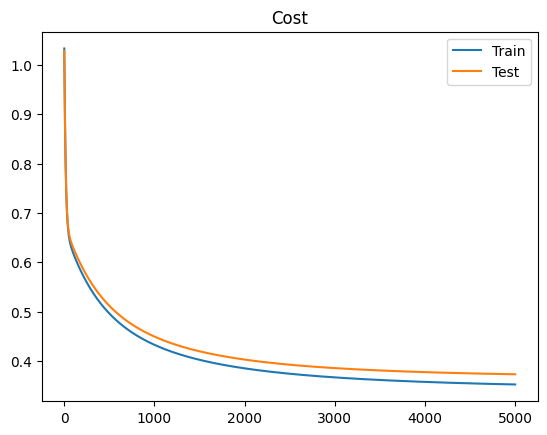

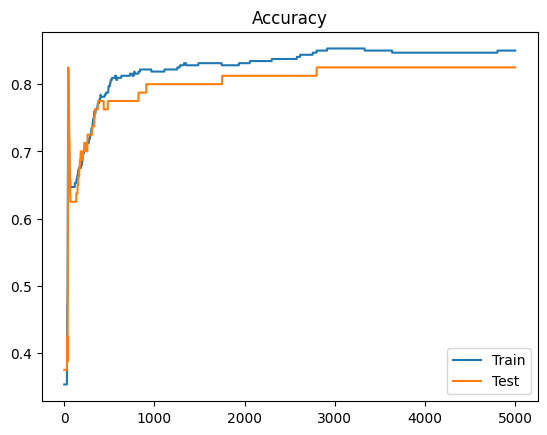

In [4]:
w = np.random.rand(2)
b = np.random.rand(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

LEARNING_RATE = 0.1
ITERATIONS = 5000

cost = []
accuracy = []

test_cost = []
test_accuracy = []

for i in range(ITERATIONS):
    z = np.dot(x_train, w) + b
    a = sigmoid(z)
    
    cost.append(np.mean(-y_train*np.log(a) - (1-y_train)*np.log(1-a)))
    accuracy.append(np.mean(np.round(a) == y_train))

    test_cost.append(np.mean(-y_test*np.log(sigmoid(np.dot(x_test, w) + b)) - (1-y_test)*np.log(1-sigmoid(np.dot(x_test, w) + b))))
    test_accuracy.append(np.mean(np.round(sigmoid(np.dot(x_test, w) + b)) == y_test))
    
    error = a - y_train
    w -= LEARNING_RATE * (np.dot(x_train.T, error) / len(x_train))
    b -= LEARNING_RATE * (np.sum(error) / len(x_train))

print('Final cost =', cost[-1])
print('Final accuracy =', accuracy[-1])

print('Final test cost =', test_cost[-1])
print('Final test accuracy =', test_accuracy[-1])

plt.plot(cost)
plt.plot(test_cost)
plt.legend(['Train', 'Test'])
plt.title('Cost')
plt.show()

plt.plot(accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'])
plt.title('Accuracy')
plt.show()

In [5]:
def predict(x):
    return np.round(sigmoid(np.dot(x, w) + b))

print('Predicted:', predict(x_test))

Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0.]
